In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import kruskal, ttest_ind, boxcox
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams
from operator import itemgetter
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('classic')
# figure size in inches
rcParams['figure.figsize'] = 10,10


train_data =r'C:\Users\joewu\Documents\code\portfolio\finished_portfolio\portfolio-projects\predicting-house-prices\train.csv'
test_data = r'C:\Users\joewu\Documents\code\portfolio\finished_portfolio\portfolio-projects\predicting-house-prices\test.csv'

#reading in data
train = pd.read_csv(train_data,header=0)
test = pd.read_csv(test_data,header=0)

print("Training set:")
display(train)
print(train.shape) #1460 rows 81 columns
display(train.describe()) #summary statistics
print("Missing values in training set:")
print(train.isna().sum()) #many missing values in training set

print("\nTest set:")
display(test)
print(test.shape) #1459 observations in test set
display(test.describe())
print("Missing values in test set:")
print(test.isna().sum()) #many missing values in test set

#dropping Id column
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

#organizing columns by data type
numeric_categorical = ['MSSubClass','MoSold','GarageYrBlt']

numeric_continuous = ['LotFrontage','LotArea','MasVnrArea',
                     'BsmtFinSF2','BsmtUnfSF','BsmtFinSF1','TotalBsmtSF',
                     '1stFlrSF','2ndFlrSF','LowQualFinSF',
                     'GrLivArea','YearBuilt','YearRemodAdd',
                     'GarageArea','WoodDeckSF',
                     'OpenPorchSF','EnclosedPorch','3SsnPorch',
                     'ScreenPorch','PoolArea','YrSold','MiscVal']

numeric_discrete = ['OverallQual','OverallCond',
                   'BsmtFullBath','BsmtHalfBath','FullBath',
                   'HalfBath','BedroomAbvGr','KitchenAbvGr',
                   'TotRmsAbvGrd','Fireplaces','GarageCars']

string_categorical = ['MSZoning','Street','LotShape',
                     'LandContour','Utilities','LotConfig',
                     'Neighborhood','Condition1',
                     'Condition2','BldgType','HouseStyle',
                     'RoofStyle','RoofMatl','Exterior1st',
                     'Exterior2nd','MasVnrType','Foundation',
                     'Heating','CentralAir','Electrical',
                     'Functional','GarageType','GarageFinish',
                     'PavedDrive','SaleType','SaleCondition','MiscFeature',
                     'Fence','Alley']

#ordinal data must decide whether to treat as categorical or discrete
string_to_cat_or_discrete = ['LandSlope','ExterQual','ExterCond','HeatingQC','KitchenQual','BsmtQual','BsmtCond','GarageQual',
                      'GarageCond','BsmtExposure','BsmtFinType1','BsmtFinType2','PoolQC','FireplaceQu']


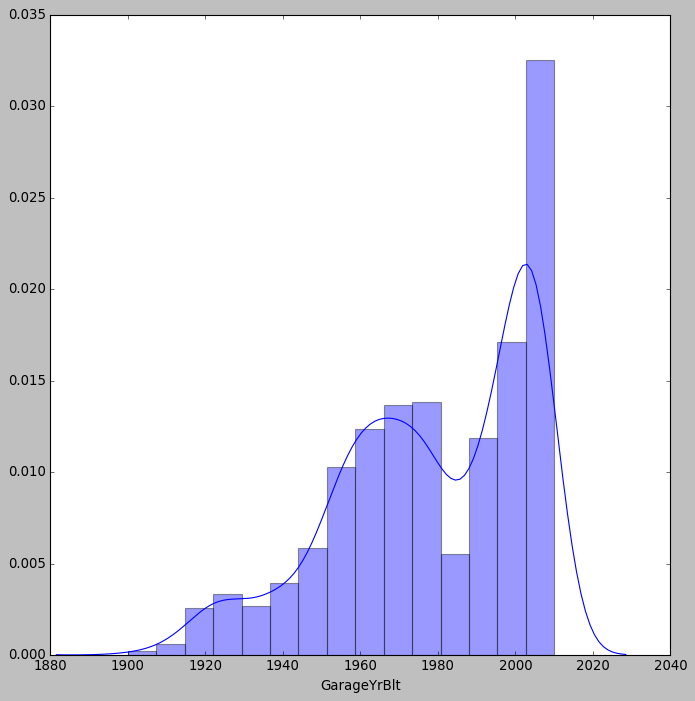

Number of values missing for GarageYrBlt in training set: 81


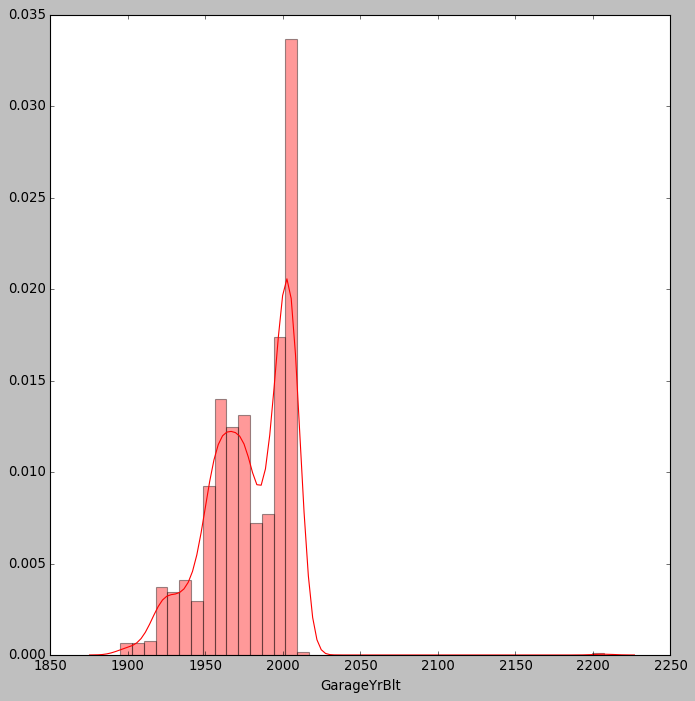

Number of values missing for GarageYrBlt in test set: 78


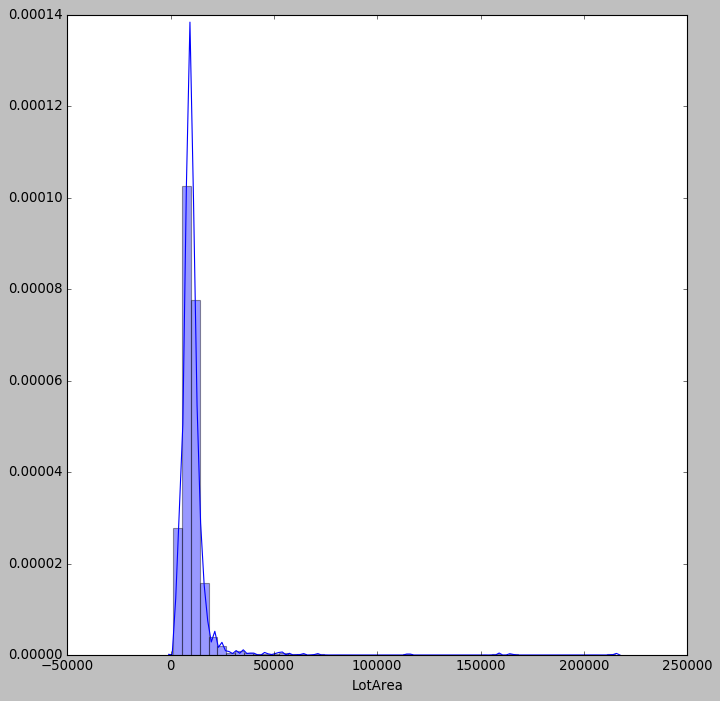

Number of values missing for LotArea in training set: 0


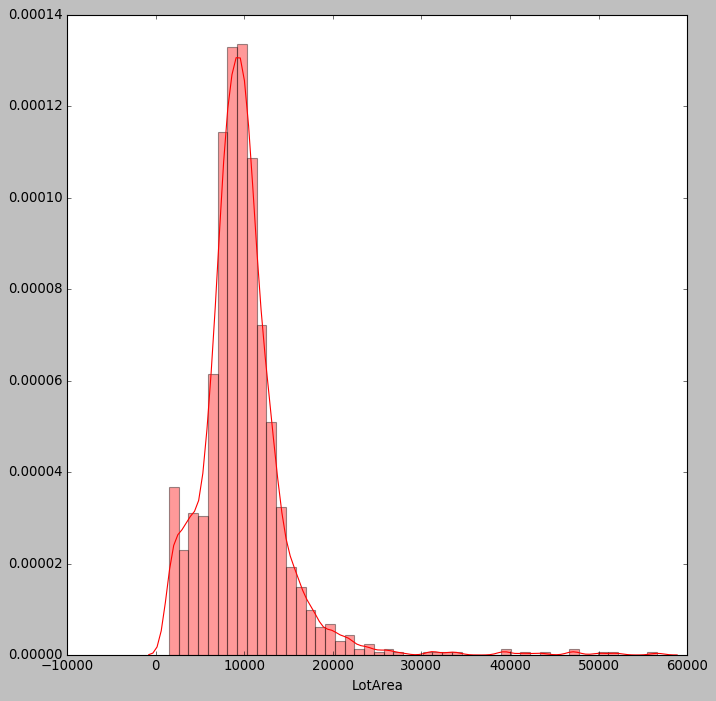

Number of values missing for LotArea in test set: 0


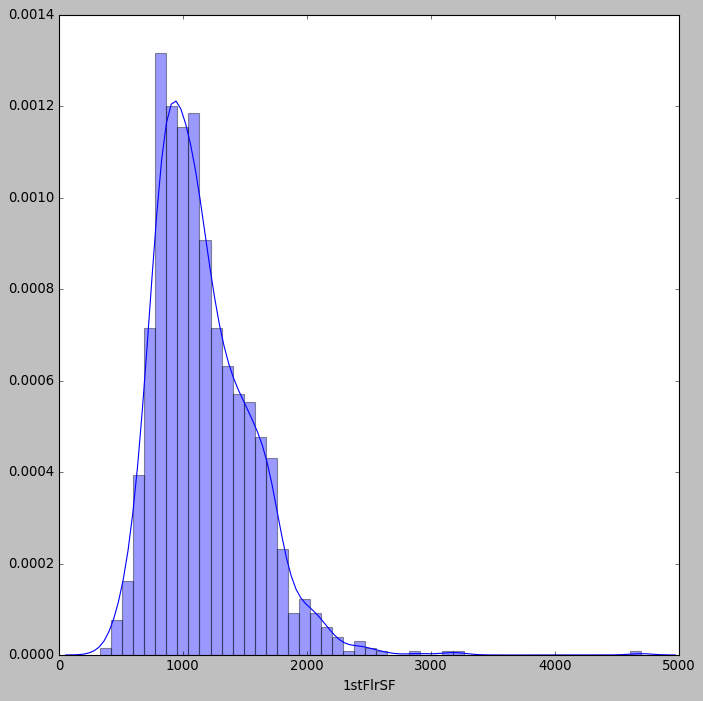

Number of values missing for 1stFlrSF in training set: 0


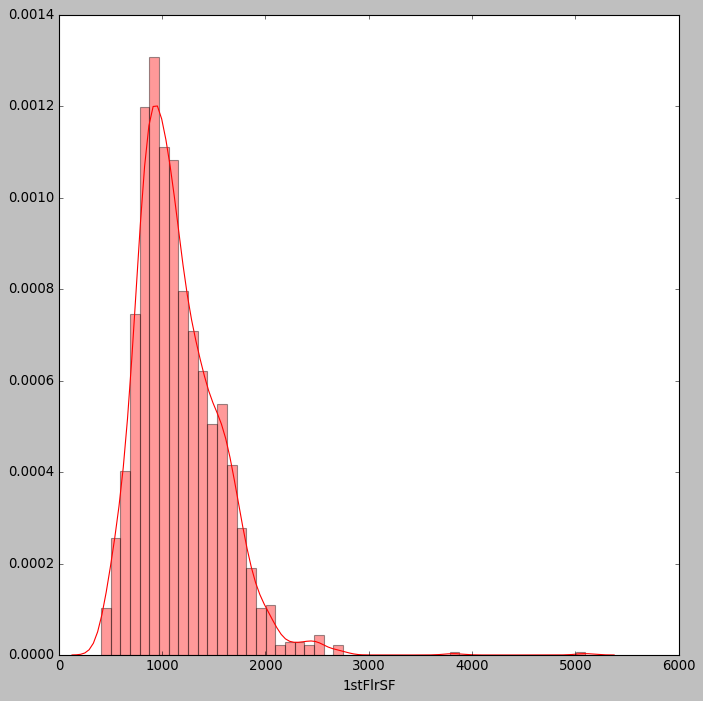

Number of values missing for 1stFlrSF in test set: 0


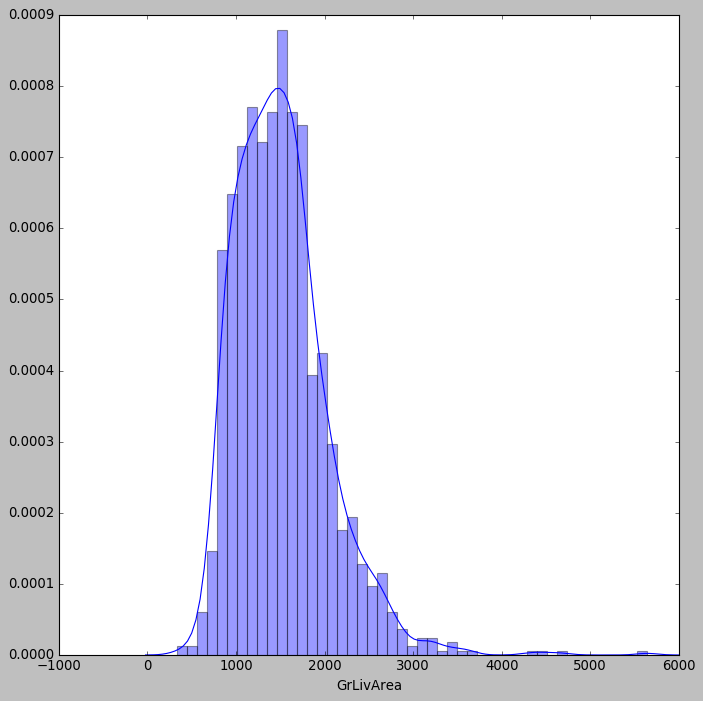

Number of values missing for GrLivArea in training set: 0


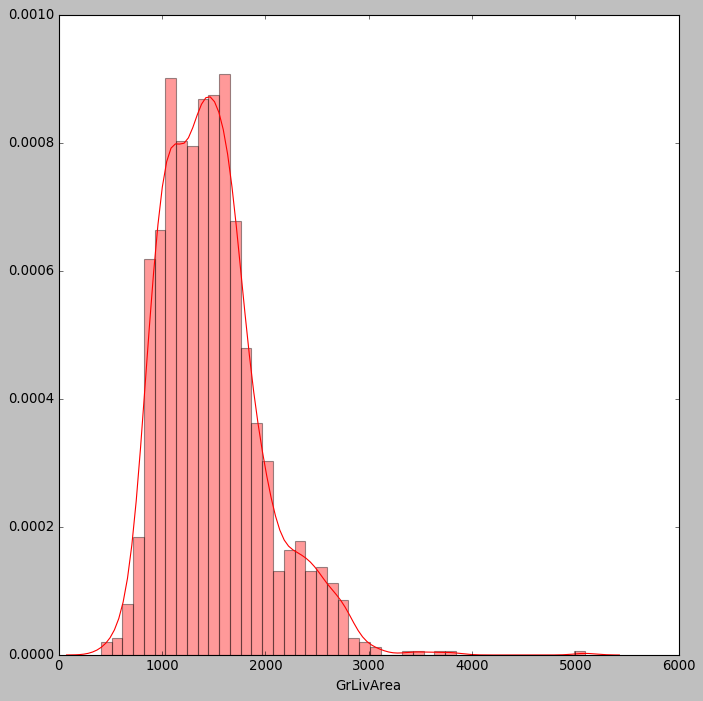

Number of values missing for GrLivArea in test set: 0
(-0.01685434960602653, 0.07786487663525617)
(-0.2075236120234063, 0.049671299979516276)
(-0.1130600311393391, 0.125536442118359)


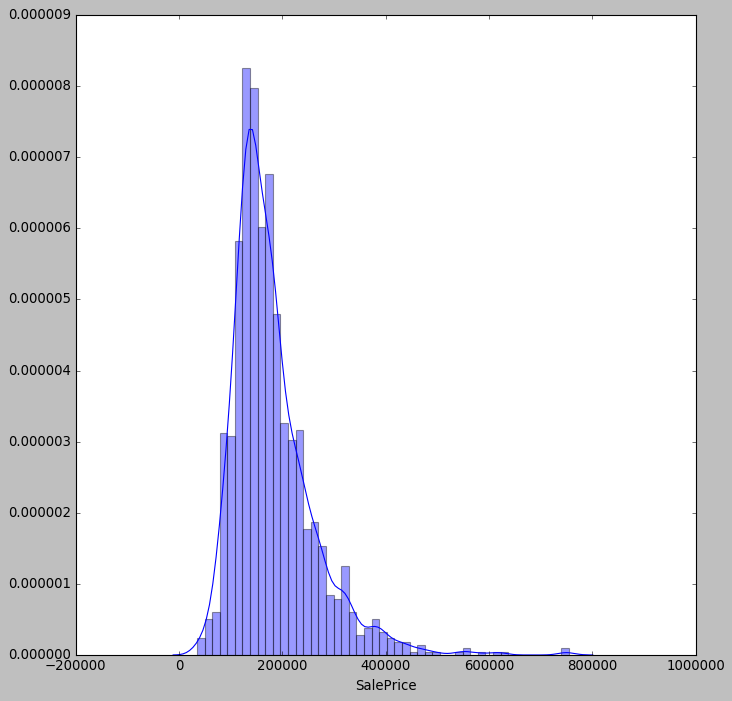

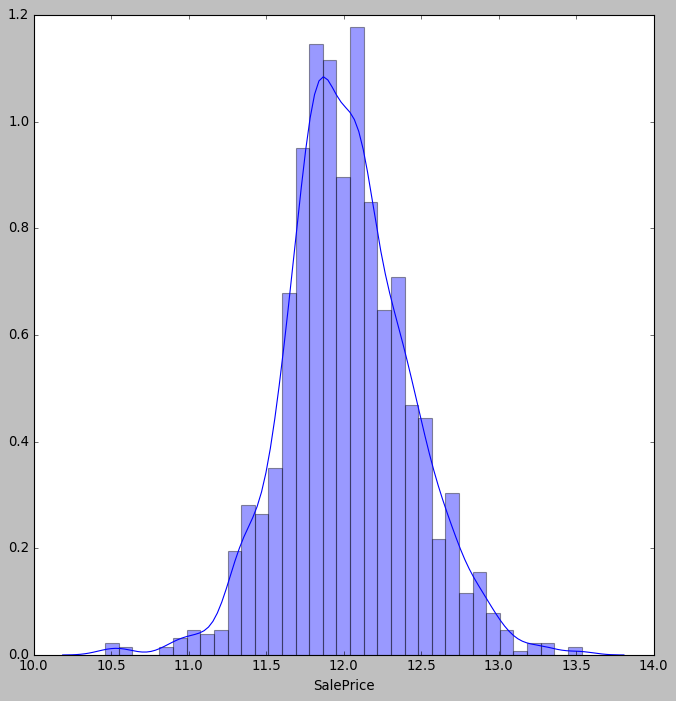

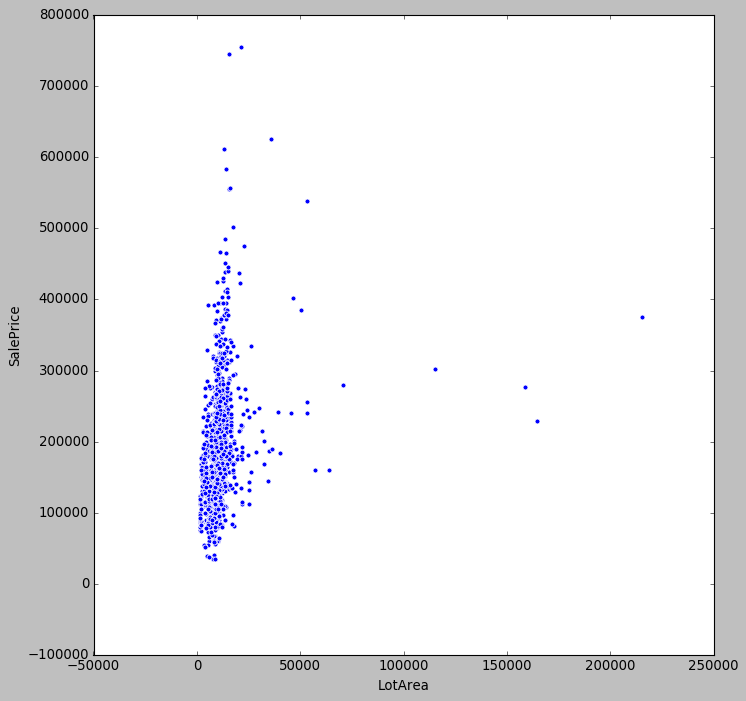

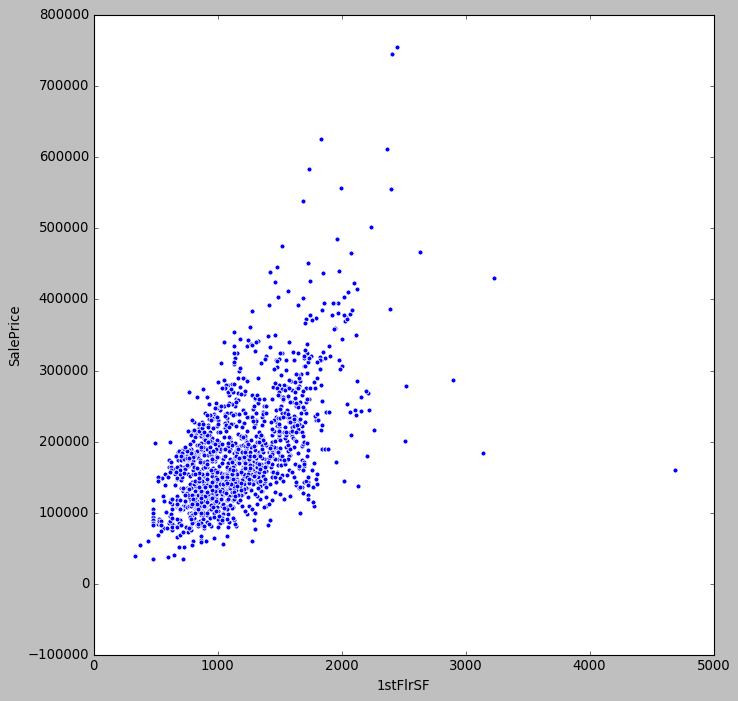

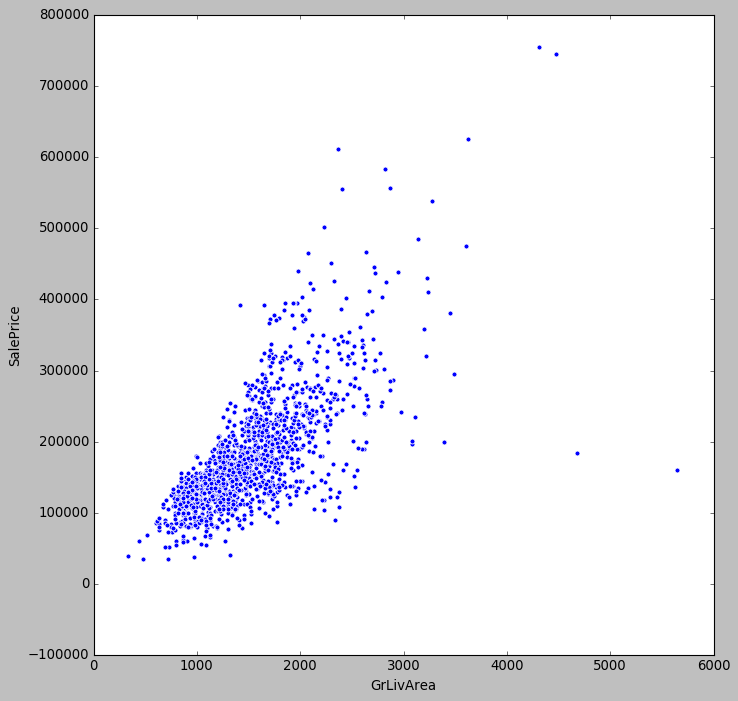

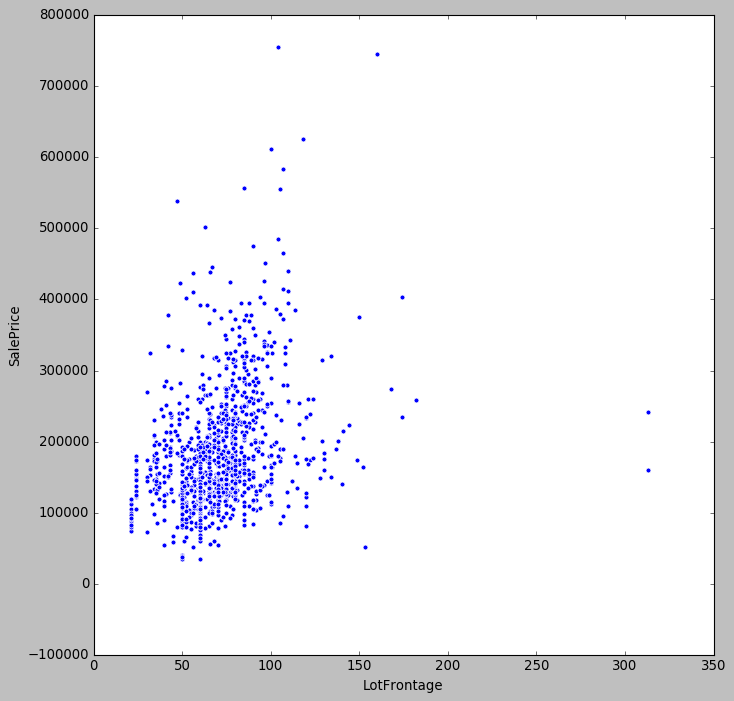

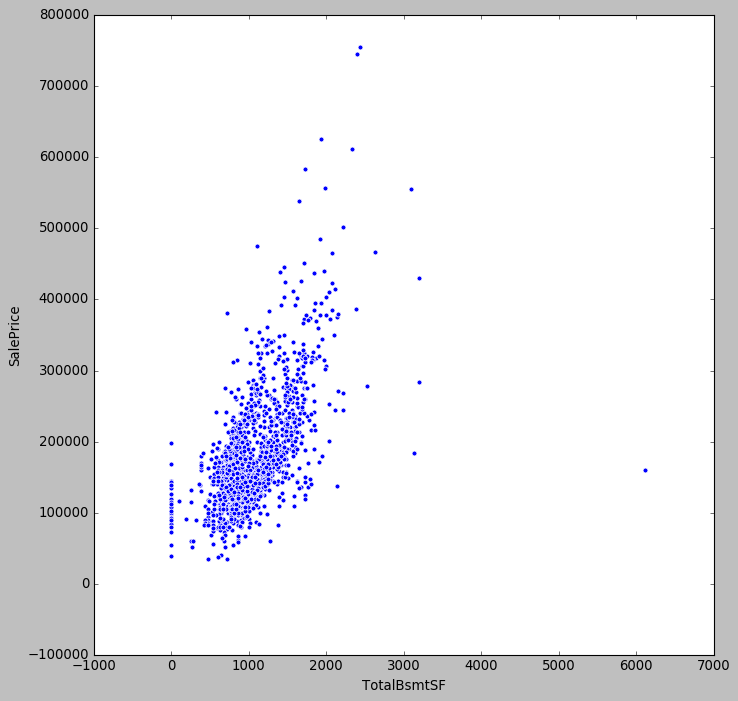

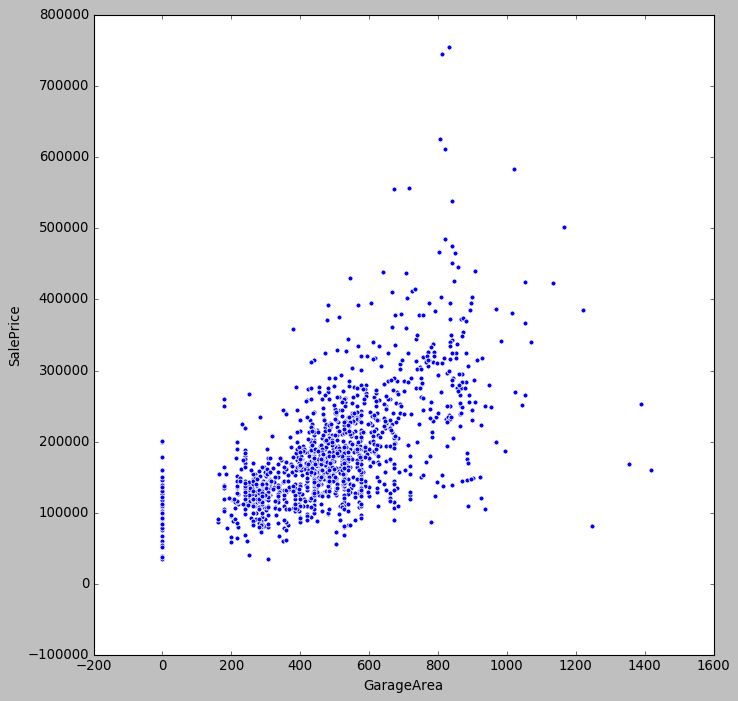

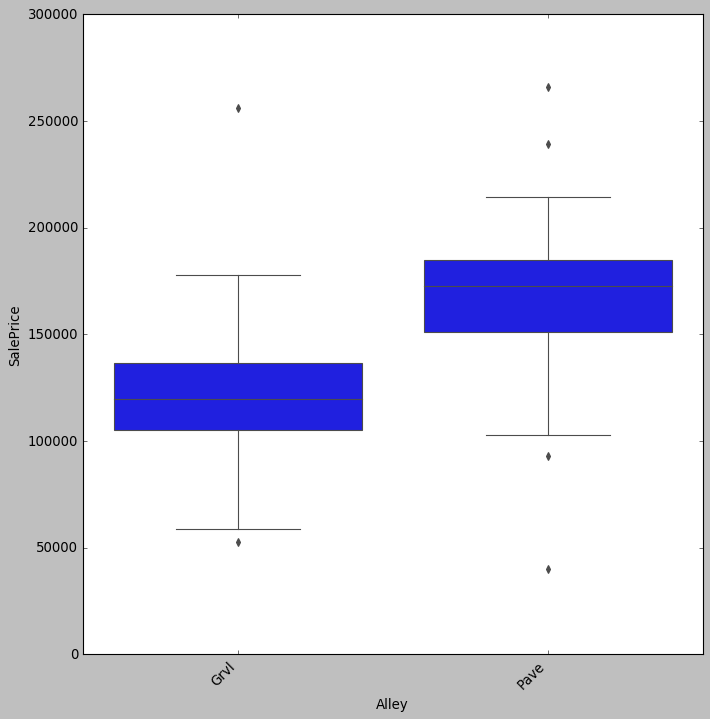

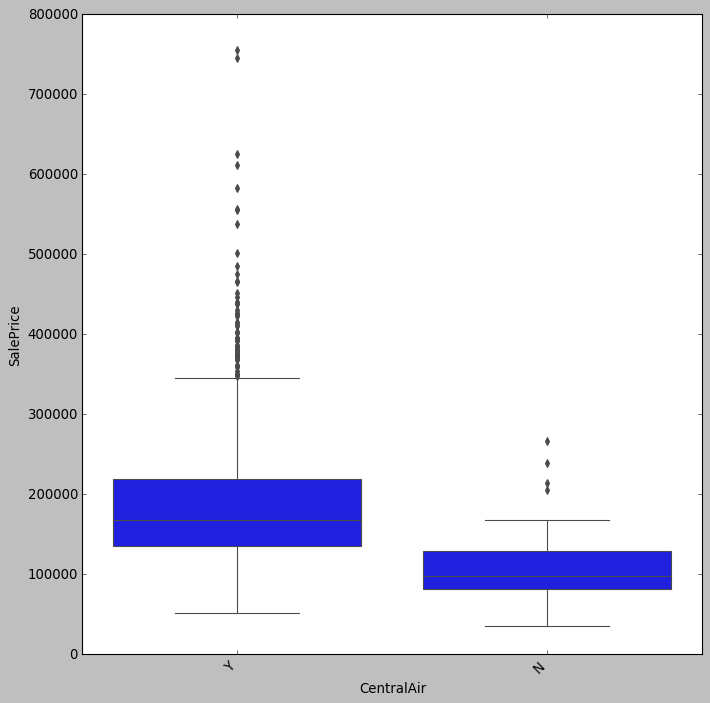

KruskalResult(statistic=45.713809901041174, pvalue=1.184056173794853e-10)
Ttest_indResult(statistic=17.267772563668995, pvalue=2.280814388186851e-37)


In [90]:
################ Exploratory Data Analysis ########### 

#Uncomment to visualize all plots. Selected significant plots shown below.
"""
for i in numeric_categorical:
    if (i != "GarageYrBlt"):
        sns.countplot(x=i, data=train,color='blue')
        plt.show()
        print(f"Number of missing observations in {i} in training set: {train[i].isna().sum()}")
        sns.countplot(x=i, data=test,color='red')
        plt.show()
        print(f"Number of missing observations in {i} in test set: {test[i].isna().sum()}")        
    else:
        sns.distplot(train.loc[~train[GarageYrBlt].isna(),GarageYrBlt],color='blue')
        plt.show()
        print(f"Number of values missing for {GarageYrBlt} in training set: {train[GarageYrBlt].isna().sum()}")
        sns.distplot(test.loc[~test[GarageYrBlt].isna(),GarageYrBlt],color='red')
        plt.show()
        print(f"Number of values missing for {GarageYrBlt} in test set: {test[GarageYrBlt].isna().sum()}")

for i in numeric_continuous:
    sns.distplot(train.loc[~train[i].isna(),i],color='blue')
    plt.show()
    print(f"Number of values missing for {i} in training set: {train[i].isna().sum()}")
    sns.distplot(test.loc[~test[i].isna(),i],color='red')
    plt.show()
    print(f"Number of values missing for {i} in test set: {test[i].isna().sum()}")


for i in numeric_discrete:
    sns.countplot(i,data=train,color='blue')
    plt.show()
    print(f"Number of observations missing from {i} in training set: {train[i].isna().sum()}")
    sns.countplot(i,data=test,color='red')
    plt.show()
    print(f"Number of observations missing from {i} in test set: {test[i].isna().sum()}")
    
for i in string_categorical:
    sns.countplot(i,data=train,color='blue',order=train[i].dropna().unique())
    plt.xticks(rotation=45,ha='right')
    plt.show()
    print(f"Number of observations missing from {i} in training set: {train[i].isna().sum()}")
    sns.countplot(i,data=test,color='red',order=train[i].dropna().unique())
    plt.xticks(rotation=45,ha='right')
    plt.show()
    print(f"Number of observations missing from {i} in test set: {test[i].isna().sum()}")
    
for i in string_to_cat_or_discrete:
    sns.countplot(i,data=train,color='blue',order=train[i].dropna().unique())
    plt.xticks(rotation=45,ha='right')
    plt.show()
    print(f"Number of observations missing from {i} in training set: {train[i].isna().sum()}")
    sns.countplot(i,data=test,color='red',order=train[i].dropna().unique())
    plt.xticks(rotation=45,ha='right')
    plt.show()
    print(f"Number of observations missing from {i} in test set: {test[i].isna().sum()}")
    
for i in numeric_categorical:
    if (i == "GarageYrBlt"):
        sns.boxplot(x=i,y="SalePrice",data=train,color='blue')
        plt.xticks(rotation=90,ha='right',fontsize=8)
        plt.show()
    else:
        sns.boxplot(x=i, y="SalePrice", data=train,color='blue')
        plt.show()
    
for i in numeric_continuous:
    sns.scatterplot(x=i,y='SalePrice',data=train)
    plt.show()

for i in string_categorical:
    sns.boxplot(x=i,y='SalePrice',data=train,color='blue')
    plt.xticks(rotation=45,ha='right')
    plt.show()

for i in string_to_cat_or_discrete:
    sns.boxplot(train[i],train['SalePrice'])
    plt.show()
"""

#More data on homes sold in recent years.
sns.distplot(train.loc[~train[GarageYrBlt].isna(),GarageYrBlt],color='blue')
plt.show()
print(f"Number of values missing for {GarageYrBlt} in training set: {train[GarageYrBlt].isna().sum()}")
sns.distplot(test.loc[~test[GarageYrBlt].isna(),GarageYrBlt],color='red')
plt.show()
print(f"Number of values missing for {GarageYrBlt} in test set: {test[GarageYrBlt].isna().sum()}")

#GarageYrBlt  observation with typo 2207 likely to be 2007
#correcting year value with typo (setting to 2007 instead of 2207)
test.loc[test['GarageYrBlt'] == 2207,'GarageYrBlt'] = 2007

#selected columns appear to need log transformations
need_log_continuous = ['LotArea','1stFlrSF','GrLivArea']

for i in need_log_continuous:
    sns.distplot(train.loc[~train[i].isna(),i],color='blue')
    plt.show()
    print(f"Number of values missing for {i} in training set: {train[i].isna().sum()}")
    sns.distplot(test.loc[~test[i].isna(),i],color='red')
    plt.show()
    print(f"Number of values missing for {i} in test set: {test[i].isna().sum()}")

#Boxcox confidence intervals suggest log transformations for the following variables
#LotArea is skewed consider taking log of LotArea
print("\nBox-Cox confidence interval for LotArea:")
print(boxcox(train['LotArea'],alpha=0.05)[2])
print("\nBox-Cox confidence interval for 1stFlrSF:")
#1stFlrSF is skewed consider log transformation 
print(boxcox(train['1stFlrSF'],alpha=0.05)[2])
print("\nBox-Cox confidence interval for GrLivArea:")
#GrLivArea is skewed consider log transformation 
print(boxcox(train['GrLivArea'],alpha=0.05)[2])

#distribution of target variable is somewhat skewed. boxcox function suggests a log transformation is necessary
sns.distplot(train['SalePrice'])
plt.show()
boxcox(train['SalePrice'],alpha=0.05)

#SalePrice looks looks normally distributed after applying log transformation.
sns.distplot(np.log(train['SalePrice']))
plt.show()

#following variables show positive linear relationship with Sale Price
significant_continuous = need_log_continuous + ['LotFrontage','TotalBsmtSF','GarageArea']

for i in significant_continuous:
    sns.scatterplot(x=i,y='SalePrice',data=train)
    plt.show()
    

#Alley and CentralAir appear significant
significant_string_cat = ['Alley','CentralAir']

for i in significant_string_cat:
    sns.boxplot(x=i,y='SalePrice',data=train,color='blue')
    plt.xticks(rotation=45,ha='right')
    plt.show()

#Suspect Alley is a significant variable
grvl_group = train.loc[train['Alley'] == 'Grvl','SalePrice'] 
pave_group = train.loc[train['Alley'] == 'Pave','SalePrice'] 
na_group = train.loc[train['Alley'].isna(),'SalePrice']
#kruskal-wallis test. Basically a on parametric anova which tests whether medians of groups are different
print(kruskal(grvl_group,pave_group,na_group))
#P-value is small. would reject null hypothesis. Evidence suggests difference in median home price for different
#types of alleys. The aim is to build a model with only the most significant variables. Whether this is selected
#as one of the most significant variables will be seen later on.

#Suspect CentralAir is a significant variable
y_group_cent_air = train.loc[train['CentralAir'] == 'Y','SalePrice']
n_group_cent_air = train.loc[train['CentralAir'] == 'N','SalePrice']
# 2-sided t-test for independent samples
print(ttest_ind(y_group_cent_air,n_group_cent_air,equal_var=False))
#small P-value therefore reject Null hypothesis. Evidence suggests that there is a difference in the mean.

#from variables in string_to_cat_or_discrete
#Variables to treat as discrete LandSlope,ExterQual,ExterCond,HeatingQC,KitchenQual
#Variables to treat as categorical BsmtQual,BsmtCond,GarageQual,GarageCond,BsmtExposure,BsmtFinType1,
#BsmtFinType2,PoolQC,FireplaceQu

(1460, 358)
(1459, 358)
Accuray of random forest 0.887286402144756 (R² score)

Top features:
OverallQual
LogGrLivArea
TotalBsmtSF
GarageArea
GarageCars
Log1stFlrSF
BsmtFinSF1
YearBuilt
LogLotArea
CentralAir_Y
YearRemodAdd
OverallCond
2ndFlrSF
Fireplaces
BsmtUnfSF
Highly correlated variables:
TotalBsmtSF Log1stFlrSF
GarageArea GarageCars
GarageCars GarageArea
Log1stFlrSF TotalBsmtSF
Accuracy of linear model 0.894567268850809 (R² score)


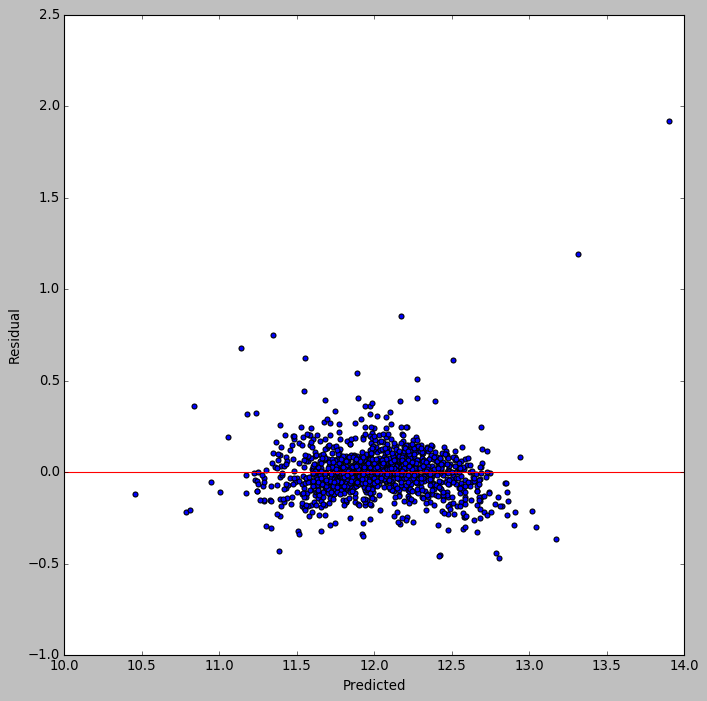

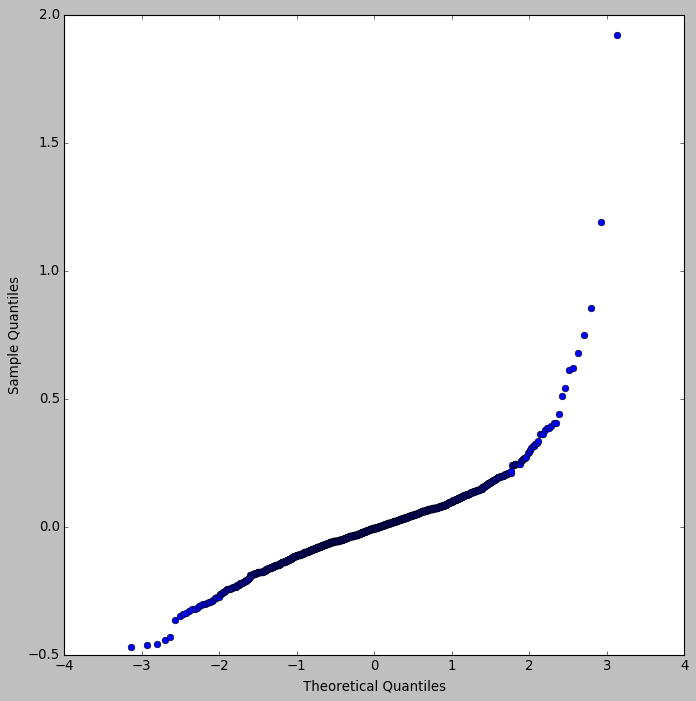

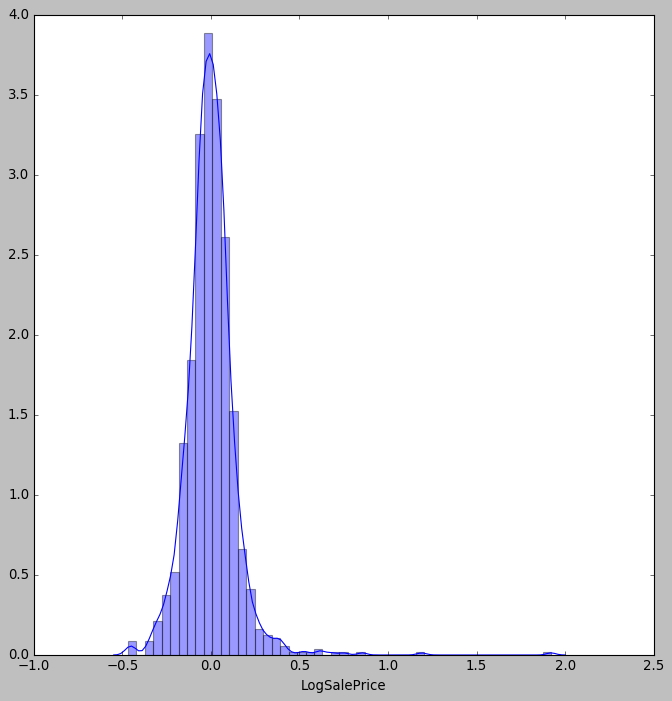

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                 1168
Model:                            RLM   Df Residuals:                     1154
Method:                          IRLS   Df Model:                           13
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 01 Jul 2020                                         
Time:                        16:11:47                                         
No. Iterations:                    27                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      0.0753      0.004     19.713   

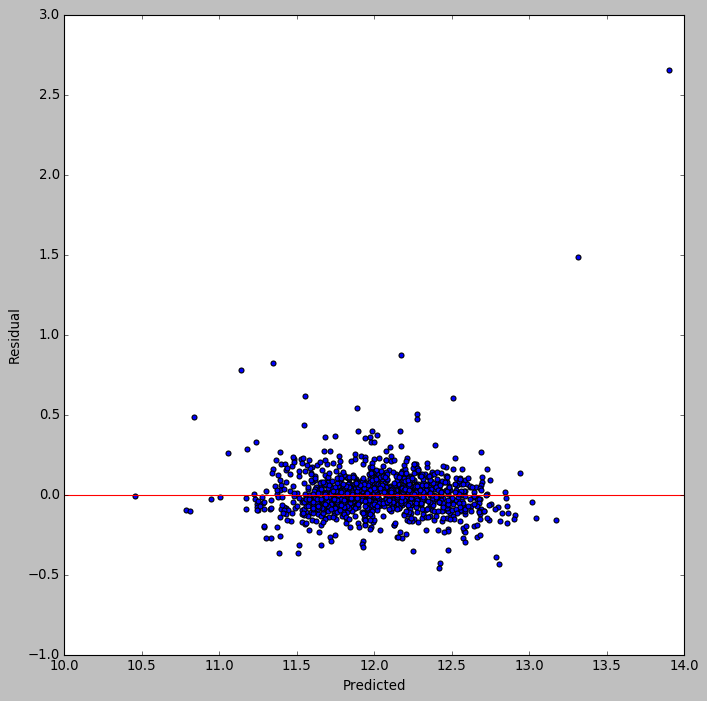

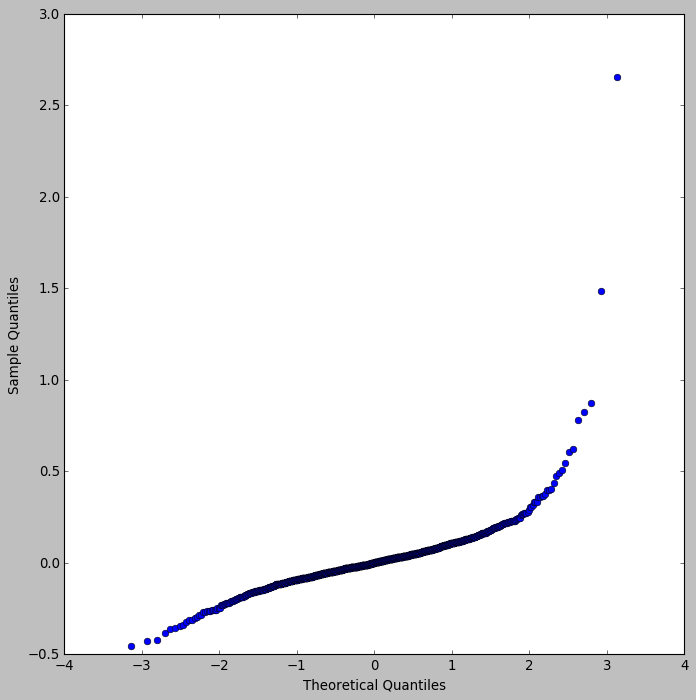

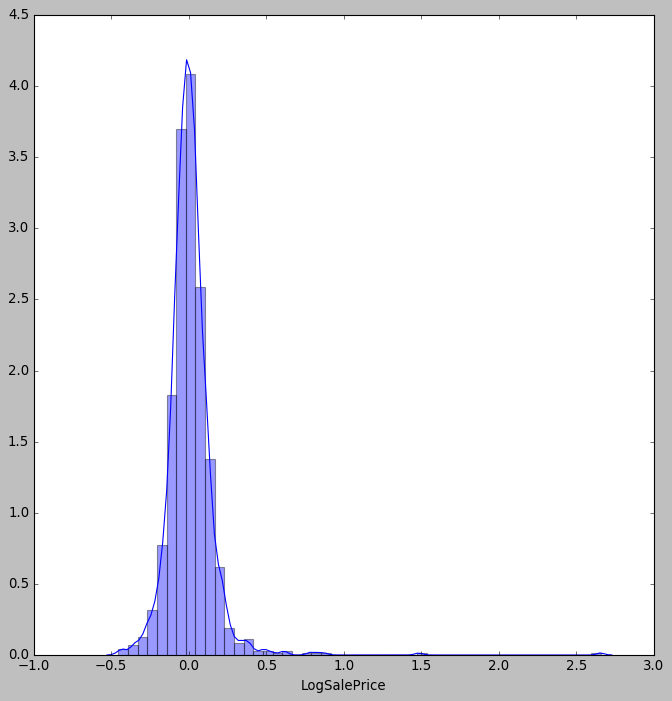

Accuracy of robust linear model 0.9045902041276549 (R² score)


In [91]:
####### Dealing with missing values ########

#replace missing MSZoning value in test with mode from training set
test.loc[test['MSZoning'].isna(),'MSZoning'] = train['MSZoning'].mode()[0]

#replace missing values in LotFrontage with median from training set
train.loc[train['LotFrontage'].isna(),'LotFrontage'] = train['LotFrontage'].median()
test.loc[test['LotFrontage'].isna(),'LotFrontage'] = train['LotFrontage'].median()

#missing values in test for utilities should be replaced with mode for utilities
#which is 'AllPub'
test.loc[test['Utilities'].isna(),'Utilities'] = 'AllPub'

#replace missing values in test for Exterior1st with mode (VinylSd)
train['Exterior1st'].value_counts()
test.loc[test['Exterior1st'].isna(),'Exterior1st'] = 'VinylSd'

#replace missing values in test for Exterior2nd with mode (VinylSd)
test.loc[test['Exterior2nd'].isna(),'Exterior2nd'] = 'VinylSd'

#replace missing MasVnrType below with BrkFace since it has MasVnrArea but no MasVnrType.
train['MasVnrType'].value_counts()
test.loc[test['MasVnrType'].isna() & ~test['MasVnrArea'].isna(),'MasVnrType'] = 'BrkFace'

#replace 'MasVnrType' with mode (None) in both train and test
train.loc[train['MasVnrType'].isna(),'MasVnrType'] = 'None'
test.loc[test['MasVnrType'].isna(),'MasVnrType'] = 'None'
#For rows replaced with None also set MasVnrArea = 0
train.loc[train['MasVnrType'] == 'None','MasVnrArea'] = 0
test.loc[test['MasVnrType'] == 'None','MasVnrArea'] = 0

#set observation with missing value in train set BsmtFinType2 but not missing value in BsmtQual to 'Unf'
train.loc[train['BsmtFinType2'].isna() & ~train['BsmtQual'].isna(),'BsmtFinType2'] = 'Unf'
#set observation with missing value in train set for BsmtExposure but not missing value in BsmtQual to 'No'
train.loc[train['BsmtExposure'].isna() & ~train['BsmtQual'].isna(),'BsmtExposure'] = 'No'


#Set 'BsmtFinSF1','BsmtUnfSF','BsmtFinSF2','TotalBsmtSF','BsmtFullBath','BsmtHalfBath' = 0
#where TotalBsmtSF and related columns are missing in test
test.loc[test['TotalBsmtSF'].isna(),['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                                                                     'BsmtFullBath','BsmtHalfBath']] = 0
#where BsmtCond values are missing but BsmtFinType2 is not in test set should be set to mode (TA)
test.loc[test['BsmtCond'].isna() & ~test['BsmtFinType2'].isna(),'BsmtCond'] = 'TA'
#where BsmtQual values are missing but BsmtFinType2 is not in test set should be set to mode (TA)
test.loc[test['BsmtQual'].isna() & ~test['BsmtFinType2'].isna(),'BsmtQual'] = 'TA'
#where BsmtExposure values are missing but BsmtFinType2 is not in test set should be set to mode (No)
test.loc[test['BsmtExposure'].isna() & ~test['BsmtFinType2'].isna(),'BsmtExposure'] = 'No'

#all related columns indicate that observation with missing BsmtFullBath and BsmtHalfBath does not have a basement
test.loc[test['BsmtFullBath'].isna(),['BsmtFullBath','BsmtHalfBath']] = 0

#replace missing values in Electrical column with the mode
train.loc[train['Electrical'].isna(),'Electrical']  = train['Electrical'].mode()[0]

#replace missing KitchenQual value with mode
test.loc[test['KitchenQual'].isna(),'KitchenQual'] = train['KitchenQual'].mode()[0]

#replace missing Functional value with mode
test.loc[test['Functional'].isna(),'Functional']= train['Functional'].mode()[0]

#assuming value in garageType is mistake since most other values in related columns are missing
test.loc[test['GarageCars'].isna(),'GarageType'] = np.nan
test.loc[test['GarageCars'].isna(),'GarageArea'] = 0
test.loc[test['GarageCars'].isna(),'GarageCars'] = 0


#imputing missing values for observation with some Garage related variable values missing
test.loc[test['GarageYrBlt'].isna() & ~test['GarageType'].isna(),'GarageFinish'] = train['GarageFinish'].mode()[0]
test.loc[test['GarageYrBlt'].isna() & ~test['GarageType'].isna(),'GarageQual'] = train['GarageQual'].mode()[0]
test.loc[test['GarageYrBlt'].isna() & ~test['GarageType'].isna(),'GarageCond'] = train['GarageCond'].mode()[0]
test.loc[test['GarageYrBlt'].isna() & ~test['GarageType'].isna(),'GarageYrBlt'] = train['GarageYrBlt'].median()

#replacing missing SaleType value with mode 
test.loc[test['SaleType'].isna(),'SaleType'] = train['SaleType'].mode()[0]

LandSlope_replace = {'Gtl':1,'Mod':2,'Sev':3}
train['LandSlope'].replace(LandSlope_replace,inplace=True)
test['LandSlope'].replace(LandSlope_replace,inplace=True)

pofatagdexcolumns = ['ExterQual','ExterCond','HeatingQC',
                    'KitchenQual']

pofatagdex = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
for i in pofatagdexcolumns:
    train[i].replace(pofatagdex,inplace=True)
    test[i].replace(pofatagdex,inplace=True)

to_dummies = string_categorical + numeric_categorical  + ['BsmtQual','BsmtCond','GarageQual','GarageCond','BsmtExposure',
                                           'BsmtFinType1','BsmtFinType2','PoolQC','FireplaceQu']

########## transforming variables #############
train['LogGrLivArea'] = np.log(train['GrLivArea'])
train['Log1stFlrSF'] = np.log(train['1stFlrSF'])
train['LogLotArea'] = np.log(train['LotArea']) 
test['LogGrLivArea'] = np.log(test['GrLivArea'])
test['Log1stFlrSF'] = np.log(test['1stFlrSF'])
test['LogLotArea'] = np.log(test['LotArea']) 

train['LogSalePrice'] = np.log(train['SalePrice'])

#dropping original columns for transformed columns
cols_to_drop = ['GrLivArea','1stFlrSF','LotArea']
train.drop(cols_to_drop,axis=1,inplace=True)
test.drop(cols_to_drop,axis=1,inplace=True)

#dropping LogSalePrice and SalePrice from training set
y_train = train['LogSalePrice']
train.drop(['SalePrice','LogSalePrice'],axis=1,inplace=True)

#creating dummy variables for columns where necessary
for i in to_dummies:
    train_dummies = pd.get_dummies(train[i],prefix=i,drop_first=True)
    train = train.join(train_dummies)
    train.drop(i,axis=1,inplace=True)
    test_dummies = pd.get_dummies(test[i],prefix=i,drop_first=True)
    test = test.join(test_dummies)
    test.drop(i,axis=1,inplace=True)
    
#differing number of columns caused by dummy column creation
#adding columns from test set missing in training set to training set
for i in test.columns.values:
    if i not in train.columns.values:
        train[i] = 0

#adding columns from training set missing in test set to test set
for i in train.columns.values:
    if i not in test.columns.values:
        test[i] = 0
        
#reordering columns in test set to match order in training set
test = test.loc[:,train.columns.values]

#final check to make sure same number and order of columns
for i in range(train.shape[1]):
    if train.columns.values[i] != test.columns.values[i]:
        print(i)
        
print(train.shape)
print(test.shape)

################ Dimensionality Reduction ##########
np.random.seed(248)

#splitting training set into a new training set and a new test set
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(train,y_train,test_size=0.20)

#using a Random Forest for dimensionality reduction (only most important features kept)
rfmod = RandomForestRegressor(n_estimators=100)
rfmod.fit(new_X_train,new_y_train)
rfmod_y_hat = rfmod.predict(new_X_test)
print("Accuray of random forest " + str(r2_score(new_y_test,rfmod_y_hat)) + " (R\N{SUPERSCRIPT TWO} score)")

feature_importances = []
for i in range(len(new_X_train.columns.values)):
    feature_importances.append((new_X_train.columns.values[i],rfmod.feature_importances_[i]))

sorted_feature_importances = sorted(feature_importances,key=itemgetter(1),reverse=True)
#print(sorted_feature_importances)
top_features = [x[0] for x in sorted_feature_importances[:15]]
#most important features
print("\nTop features:")
for i in top_features:
    print(i)

#high correlation between Log1stFlrSF and TotalBsmtSF is a problem TotalBsmtSF is kept (due to higher variable importance)
#GarageCars and GarageArea are highly correlated GarageArea will be kept in model
print("Highly correlated variables:")
x_ind,y_ind = np.where(new_X_train.loc[:,top_features].corr() > 0.7)
for i in range(len(x_ind)):
    if x_ind[i] != y_ind[i]:
        print(new_X_train.loc[:,top_features].corr().columns.values[x_ind[i]],new_X_train.loc[:,top_features].corr().columns.values[y_ind[i]])
top_features.remove("Log1stFlrSF")
top_features.remove("GarageCars")

######### Model Selection / Diagnostics ######

#fitting model to new train
linmod = LinearRegression()
linmod.fit(new_X_train.loc[:,top_features],new_y_train)
linmod_y_hat = linmod.predict(new_X_test.loc[:,top_features])
print("Accuracy of linear model " + str(r2_score(new_y_test,linmod_y_hat)) + " (R\N{SUPERSCRIPT TWO} score)")

#qqplot of the residuals.
#Distribution of residuals is slightly skewed to the right but still fairly normally distributed.
train_pred = linmod.predict(new_X_train.loc[:,top_features])
res = train_pred  - new_y_train

#residual plot shows major outliers however there is no obvious trend, suggesting homoscedasticity
plt.scatter(train_pred,res)
plt.plot([10,14],[0,0],color='red')
plt.xlim((10,14))
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()

#qqplot of the residuals shows that there are outliers present
sm.qqplot(res)
plt.show()

#histogram with density estimate of residuals.
# The histogram of the residuals shows a bell shaped curve with heavy tails due to the outliers.
sns.distplot(res)
plt.show()

new_X_train = new_X_train.copy()
new_X_train['intercept'] = 1
top_features.append('intercept')

#outliers are present therefore utilizing a robust linear model
rlm_model = sm.RLM(new_y_train, new_X_train.loc[:,top_features], M=sm.robust.norms.TukeyBiweight())
rlm_results = rlm_model.fit()
#displays coefficients standard errors and 95 % confidence intervals
#summary suggests that CentralAir_Y is not significant at the 0.05 significance level
print(rlm_results.summary(yname='y',xname=['%s' % i for i in rlm_results.params.index.values]))

top_features.remove('CentralAir_Y')

#all features are significant
rlm_model2 = sm.RLM(new_y_train, new_X_train.loc[:,top_features], M=sm.robust.norms.TukeyBiweight())
rlm_results2 = rlm_model2.fit()
print(rlm_results2.summary(yname='y',xname=['%s' % i for i in rlm_results2.params.index.values]))

train_pred2 = rlm_model2.predict(rlm_results2.params,new_X_train.loc[:,top_features])
res2 = train_pred2  - new_y_train

#residual plot shows major outliers however there is no obvious trend, suggesting homoscedasticity of errors 
plt.scatter(train_pred,res2)
plt.plot([10,14],[0,0],color='red')
plt.xlim((10,14))
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()

#qqplot of the residuals shows that there are outliers present (which is expected for robust linear model)
#however the robust linear model is a good fit for most of the data
sm.qqplot(res2)
plt.show()

#histogram with density estimate of residuals.
# The histogram of the residuals shows a bell shaped curve with heavy tails due to the outliers.
sns.distplot(res2)
plt.show()

##### testing accuracy of model ####
new_X_test = new_X_test.copy()
new_X_test['intercept'] = 1
test_pred2 = rlm_model2.predict(rlm_results2.params,new_X_test.loc[:,top_features])
print("Accuracy of robust linear model " + str(r2_score(new_y_test,test_pred2)) + " (R\N{SUPERSCRIPT TWO} score)")

####### Generating predictions with robust linear model #####

train['intercept'] = 1
test['intercept'] = 1

rlm_model3 = sm.RLM(y_train, train.loc[:,top_features], M=sm.robust.norms.TukeyBiweight())
rlm_results3 = rlm_model3.fit()
submission_predictions = rlm_model3.predict(rlm_results3.params,test.loc[:,top_features])

######### Creating predictions csv file to submit to Kaggle ######
submission_predictions = np.exp(submission_predictions)
Id = range(1461,len(submission_predictions)+1461)

#submission score of 0.14330 on Kaggle
predictions = pd.DataFrame({'Id':Id,'SalePrice':submission_predictions})
predictions.to_csv(r'C:\Users\joewu\Documents\code\portfolio\finished_portfolio\portfolio-projects\predicting-house-prices\house_price_predictions.csv',index=False)

In [ ]:
""" Model interpretation
For every one one unit increase in overall quality there is about an 8% increase in the median sale price.

For every 1% increase in the log (natural log) above grade living area square footage there is a 0.3% increase
in the median sale price.

For every one square foot increase in the basement total square footage  there is a 0.02% increase in the
median sale price.

For every one square foot increase in the total garage area there is a 0.02% increase in the median
sale price.

For every one square foot increase in the type one basement finished square footage there is a 0.005%
increase in the median sale price.

For every one year increase in the year built there is a 0.3% increase in the median sale price.

For every 1% in the log (natural log) of the lot area (square ft) there is a 0.1% increase in the median sale price.

For every one year increase in the remodel date then there is a 0.13% increase in the median sale price.

For every one unit increase in the overall condition there is a 4.4% increase in the median sale price.

For every one square foot increase in the second floor square footage there is a 0.007% increase in the median sale price.

For every additional fireplace there is about a 4% increase in the median sale price of a home.

For every one square foot increase in the unifinished square feet of basement area there is a 0.005% decrease in the median
sale price.

    Conclusion
A robust linear model was used in order to create an easily interpretable model which would be accurate for most of the
data without being heavily influenced by outliers. It achieved a submission score of 0.13591 on kaggle where the score is
the root mean squared error between the log of the predicted value and the log of the observed sale price.A greater
accuracy is easily achievable by a gradient boosting regression tree model, however the small increase in accuracy
comes at the expense of interpretablility which is undesirable in this case.

    Suggestions
The company from which the dataset was obtained could improve the efficiency of analysts by having different values for
none and missing. For example there were variables such as garage quality which used NA for no garage, however, NA is also
used to denote missing values. Therefore it was necessary to compare the values in garage quality with other garage related
variables in order to determine whether there was no garage or whether there was simply a missing value for that variable.
In some cases the variables in garage related field did not agree making it difficult to determine whether an observation
had no garage or simply had multiple fields with missing values. This issue could easily be resolved by specifying the
absence of a garage or basement or any other variable with something other than NA. Such changes would allow future analyses
to be conducted more efficiently.

"""
